<a href="https://colab.research.google.com/github/Susmita-Priya/twitter_depression/blob/main/Twitter_dataset1(preprocessing%2Bhypertuning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depression Detection Using Twitter Dataset

In [ ]:
#IMPORTING NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
twitter_df = pd.read_csv('sentiment_tweets3.csv', encoding =('ISO-8859-1'),low_memory =False)
twitter_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [ ]:
# RENAMING COLUMNS

twitter_df = twitter_df.rename(columns = {"message to examine":"Text", "label (depression result)" :"Category" })

In [ ]:
# REVIEW DATA AFTER CHANGES

twitter_df.head(5)

,Index,Text,Category
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

twitter_df = twitter_df[["Text", "Category"]]

In [ ]:
# REVIEW DATA AFTER CHANGES

twitter_df.head(5)

,Text,Category
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [ ]:
## Let's see some of the text

twitter_df.loc[10311]['Text']

'Ketamine Nasal Spray Shows Promise Against Depression, Suicide #health https://cmun.it/4sjligkÃ\x82Â\xa0'

In [ ]:
# CHECK THE SHAPE OF THE DATA

twitter_df.shape

(10314, 2)

In [ ]:
# CHECK INFO REGARDING IT

twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [ ]:
twitter_df["Category"].value_counts()

0    8000
1    2314
Name: Category, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

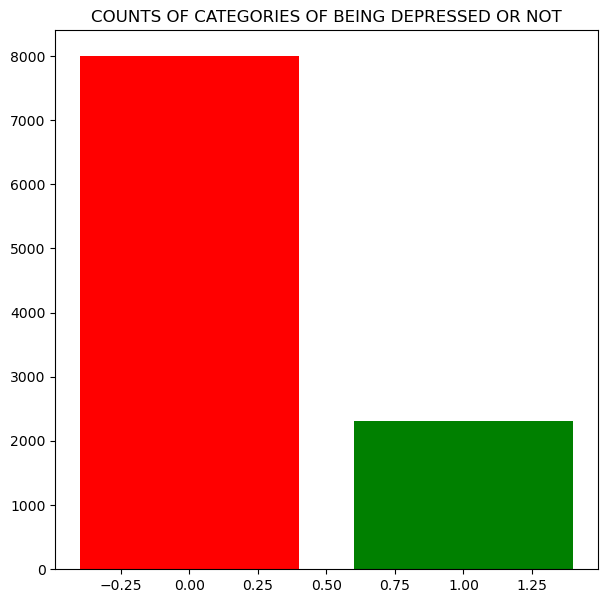

In [ ]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(7, 7))
plt.bar(twitter_df["Category"].unique(), twitter_df["Category"].value_counts(),
         color =['red', 'green'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

In [ ]:
# install wordcloud

!pip install wordcloud

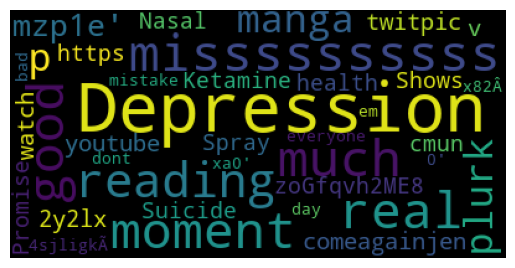

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO CHECK MOST OCCURING WORDS IN PREPROCESSED DATA

from wordcloud import WordCloud, STOPWORDS
text = twitter_df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

# **Preprocessing**

In [ ]:
# TEXTACY is used for text preprocessing
!pip install textacy

In [ ]:
# IMPORT OTHER TEXT PREPROCESSING LIBRARIES

import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textacy import preprocessing
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package omw-1.4 to C:\Users\Priya
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Priya
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Priya
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Priya
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Priya
[nltk_data]     Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Priya Saha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[

In [ ]:
# CHECK IF THERE ARE NULL VALUES
twitter_df.isnull().sum()

Text        0
Category    0
dtype: int64

In [ ]:
#check duplication
twitter_df.duplicated().sum()

31

In [ ]:
# REMOVING DUPLICATE VALUES
twitter_df = twitter_df.drop_duplicates()

In [ ]:
# SHUFFLING OUR DATASET SINCE IT IS IS UNSHUFFLED AND FIRST 8000 ROWS BELONGED TO A CERTAIN CATEGORY
# Mixing depressed and non depressed text because previosly first 8000 is non depressed text and rest of the data is depressive

twitter_df = twitter_df.sample(frac=1)
twitter_df.head(5)

,Text,Category
6064,@tommcfly well if you weren't Tom Fletcher or ...,0
3891,Ok Im gone for real this time bbl Thanks again...,0
8426,Depression is literally the biggest bitch,1
6662,@Wereuntouchable Thank youu!,0
8133,a real psychologist just said excersise and ea...,1


In [ ]:
# Check if there's any number

for i in twitter_df['Text']:
  for j in i.split():
    if j.isdigit():
      s = "yes"
    else:
      s = "no"
print(s)

no


In [ ]:
# First Remove all the numbers

def remove_numbers(text):
  return ' '.join([i for i in str(text).split() if not i.isdigit()])

twitter_df['removed_numbers'] = twitter_df['Text'].apply(lambda x: remove_numbers(x))
twitter_df.head(5)

,Text,Category,removed_numbers
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...


In [ ]:
# CONVERTING TEXT TO LOWER CASE

twitter_df["lowercase"] = twitter_df["removed_numbers"].str.lower()
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
# Removal of Weblinks

def remove_weblinks(text):
  return re.sub(r"http\S+", "", text)

twitter_df['remove_weblink'] = twitter_df['lowercase'].apply(lambda x: remove_weblinks(x))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
# Removal of URL

def remove_weblinks(text):
   text=re.sub(r"((https:|http|ftp)?(:\/\/)?(www\.)?)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)",' ',text)
   return re.sub(r'/', ' / ', text)
twitter_df['removed_url'] = twitter_df['remove_weblink'].apply(lambda x: remove_weblinks(x))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
# Remove Twitter mention

def remove_twitter(text):
  return re.sub('@[\w]+','',text)
twitter_df['removed_mention'] = twitter_df['removed_url'].apply(lambda x: remove_twitter(x))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
# REMOVING PUNCTUATION, EXTRA WHITESPACES AND HASHTAGS

preprocess = preprocessing.make_pipeline(
    preprocessing.remove.punctuation,
    preprocessing.normalize.whitespace,
    preprocessing.replace.hashtags,
)

twitter_df["remove_punctuation"] = twitter_df["removed_mention"].apply(preprocess)
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
# REMOVING THE STOPWORDS
# Stopwords do not carry any significant meaning, such as "the", "and", "is", etc. Removing stopwords is a common text preprocessing step in natural language processing tasks as they can reduce noise in the data and improve the quality of analysis.

stop = stopwords.words('english')

twitter_df["remove_stopword"] = twitter_df['remove_punctuation'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...


In [ ]:
#remove repeating_char
def clean_repeating_char(text):
    return re.sub(r"(.)\1\1+", r"\1\1", text)
twitter_df['remove_repeatedword'] = twitter_df['remove_punctuation'].apply(lambda x: clean_repeating_char(x))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword,remove_repeatedword
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...,well if you weren t tom fletcher or tom mcfly ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...,a real psychologist just said excersise and ea...


In [ ]:
def clean_emoji(text):
    data = re.sub(r'<3', '<heart>', text)
    data = re.sub(r"[8:=;]['`\-]?[)d]+", '<smile>', text)
    data = re.sub(r"[8:=;]['`\-]?\(+", '<sad>', text)
    data = re.sub(r"[8:=;]['`\-]?[\/|l*]", '<neutral>', text)
    data = re.sub(r"[8:=;]['`\-]?p+", '<laugh>', text)
    return text
twitter_df['remove_emoji'] = twitter_df['remove_repeatedword'].apply(lambda x: clean_emoji(x))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword,remove_repeatedword,remove_emoji
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
def remove_images(text):
    cleaned_tweet = re.sub(r"pic\.twitter\.com/\S+",'', text)
    cleaned_tweet = re.sub("\w+(\.png|\.jpg|\.gif|\.jpeg)", " ", text)
    return cleaned_tweet

twitter_df["remove_image"] = twitter_df["remove_emoji"].apply(remove_images)
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword,remove_repeatedword,remove_emoji,remove_image
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu,thank youu,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
# STEMMING THE WORDS
#Stemming is the process of reducing words to their base or root form, which can be useful for reducing the dimensionality of the text data.

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
twitter_df['stemmed'] = twitter_df['remove_image'].apply(lambda x: stemmer.stem(x))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword,remove_repeatedword,remove_emoji,remove_image,stemmed
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
from collections import Counter
cnt = Counter()

for text in twitter_df['stemmed'].values:
  for word in text.split():
    cnt[word] += 1

cnt.most_common(10)

[('i', 5269),
 ('to', 3828),
 ('the', 3780),
 ('a', 3083),
 ('and', 2780),
 ('you', 2696),
 ('it', 2123),
 ('depression', 2042),
 ('my', 1912),
 ('of', 1833)]

In [ ]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])

# Let's see what are the Rarewords

RAREWORDS

{'8=',
 'amercian',
 'answ',
 'cha',
 'gaeul',
 'gtr',
 'ob',
 'vm',
 'walle',
 'yijung'}

In [ ]:
# Let's remove these

def remove_rareword(text):
  return " ".join([word for word in str(text).split() if word not in RAREWORDS])
twitter_df['remove_rareword'] = twitter_df['stemmed'].apply(lambda x: remove_rareword(x))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword,remove_repeatedword,remove_emoji,remove_image,stemmed,remove_rareword
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...


In [ ]:
lemmatizer = WordNetLemmatizer()

wordnet_map = {"n": wordnet.NOUN, "v": wordnet.VERB, "j": wordnet.ADJ, "r": wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.VERB)) for word, pos in pos_tagged_text])

twitter_df["lemmatized"] = twitter_df['remove_rareword'].apply(lambda text: lemmatize_words(text))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword,remove_repeatedword,remove_emoji,remove_image,stemmed,remove_rareword,lemmatized
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im go for real this time bbl thank again to...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression be literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just say excersise and eat...


In [ ]:
short_words = {
"aint": "am not",
"arent": "are not",
"cant": "cannot",
"'cause": "because",
"couldve": "could have",
"couldnt": "could not",
"didnt": "did not",
"doesnt": "does not",
"dont": "do not",
"hadnt": "had not",
"hasnt": "has not",
"havent": "have not",
"im": "I am",
"em": "them",
"ive": "I have",
"isnt": "is not",
"lets": "let us",
"theyre": "they are",
"theyve": "they have",
"wasnt": "was not",
"well": "we will",
"were": "we are",
"werent": "were not",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def replace_short_words(text):
  for word in text.split():
    if word in short_words:
      text = text.replace(word, short_words[word])

  return text
twitter_df["replace_shortword"] = twitter_df['lemmatized'].apply(lambda text: replace_short_words(text))
twitter_df.head(5)

,Text,Category,removed_numbers,lowercase,remove_weblink,removed_url,removed_mention,remove_punctuation,remove_stopword,remove_repeatedword,remove_emoji,remove_image,stemmed,remove_rareword,lemmatized,replace_shortword
6064,@tommcfly well if you weren't Tom Fletcher or ...,0,@tommcfly well if you weren't Tom Fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,@tommcfly well if you weren't tom fletcher or ...,well if you weren't tom fletcher or tom mcfly...,well if you weren t tom fletcher or tom mcfly ...,well tom fletcher tom mcfly would like could a...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,well if you weren t tom fletcher or tom mcfly ...,we will if you weren t tom fletcher or tom mcf...
3891,Ok Im gone for real this time bbl Thanks again...,0,Ok Im gone for real this time bbl Thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone real time bbl thanks new old follow...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im gone for real this time bbl thanks again...,ok im go for real this time bbl thank again to...,ok I am go for real this tI ame bbl thank agai...
8426,Depression is literally the biggest bitch,1,Depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression literally biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression is literally the biggest bitch,depression be literally the biggest bitch,depression be literally the biggest bitch
6662,@Wereuntouchable Thank youu!,0,@Wereuntouchable Thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,@wereuntouchable thank youu!,thank youu!,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu,thank youu
8133,a real psychologist just said excersise and ea...,1,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,real psychologist said excersise eating habits...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just said excersise and ea...,a real psychologist just say excersise and eat...,a real psychologist just say excersise and eat...


In [ ]:
twitter_df = twitter_df[['replace_shortword','Category']]
twitter_df.head(5)

,replace_shortword,Category
6064,we will if you weren t tom fletcher or tom mcf...,0
3891,ok I am go for real this tI ame bbl thank agai...,0
8426,depression be literally the biggest bitch,1
6662,thank youu,0
8133,a real psychologist just say excersise and eat...,1


In [ ]:
twitter_df.columns = ['Text','Category']
twitter_df.head(5)

,Text,Category
6064,we will if you weren t tom fletcher or tom mcf...,0
3891,ok I am go for real this tI ame bbl thank agai...,0
8426,depression be literally the biggest bitch,1
6662,thank youu,0
8133,a real psychologist just say excersise and eat...,1


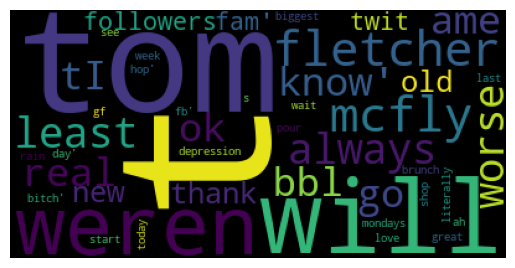

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [ ]:
# CREATING WORDCLOUD TO SEE MOST OCCURING WORDS AFTER PREPROCESSING

TEXT_AFTER_PREPROCESS = twitter_df['Text'].values

wordcloud = WordCloud().generate(str(TEXT_AFTER_PREPROCESS))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.figure(figsize = (40,40), facecolor = None)

# Text Preprocessing : Part **II**
TEXT VECTORIZATION

In [ ]:
# Assuming 'text' is the feature and 'label' is the target variable
X =  twitter_df['Text']
y = twitter_df['Category']

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

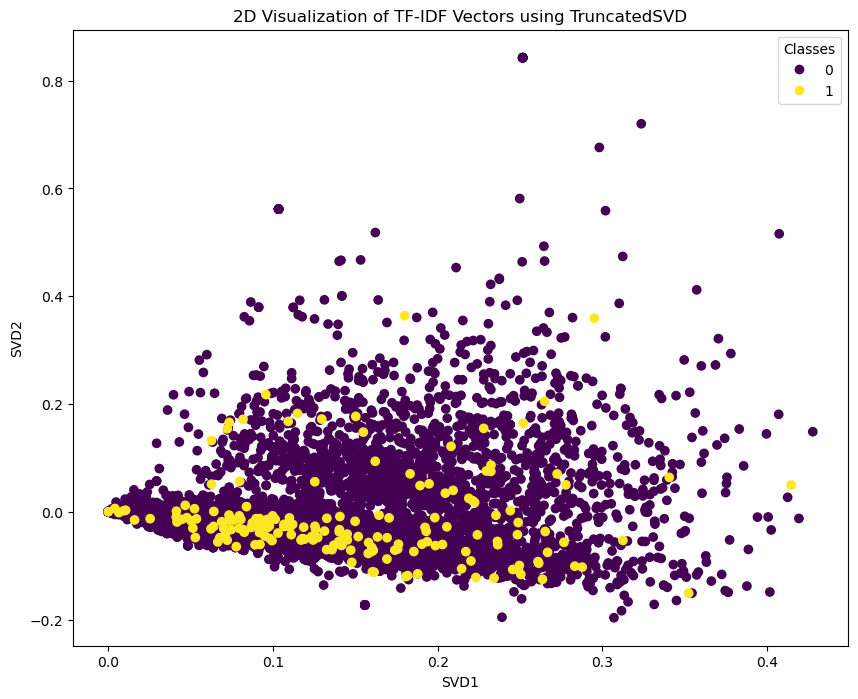

In [ ]:
from sklearn.decomposition import TruncatedSVD
# Apply TruncatedSVD for dimensionality reduction to 2D
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_train)

# Create a DataFrame for visualization
df_svd = pd.DataFrame(data=X_svd, columns=['SVD1', 'SVD2'])
df_svd['label'] = y_train

# Drop rows with NaN values in 'label' column (in case there are still NaN values after train-test split)
df_svd = df_svd.dropna(subset=['label'])

# Visualize the data in 2D if there are valid values
if not df_svd['label'].empty:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df_svd['SVD1'], df_svd['SVD2'], c=df_svd['label'], cmap='viridis')
    plt.legend(*scatter.legend_elements(), title='Classes')
    plt.title('2D Visualization of TF-IDF Vectors using TruncatedSVD')
    plt.xlabel('SVD1')
    plt.ylabel('SVD2')
    plt.show()
else:
    print("No valid values in the 'label' column after dropping NaN.")

# FITTING OUR MACHINE LEARNING MODELS

1) LOGISTIC REGRESSION MODEL

In [ ]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

In [ ]:
# Logistic Regression
logistic_regression = LogisticRegression(random_state=42)

# Define hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.001, 100),  # Adjust the range as needed
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    logistic_regression,
    param_distributions=param_dist,
    n_iter=50,  # Adjust the number of iterations as needed
    scoring='accuracy',  # Change the scoring metric if needed
    cv=5,  # Adjust the number of folds for cross-validation
    n_jobs=-1,
    random_state=42,
    verbose=2,
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_logistic_regression = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_lr = best_logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print the best hyperparameters
print('Best Hyperparameters for Logistic Regression:')
print(random_search.best_params_)

# Print the evaluation metric
print(f'Accuracy: {accuracy_lr}')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Logistic Regression:
{'C': 4.646041271999773, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9970831307729704


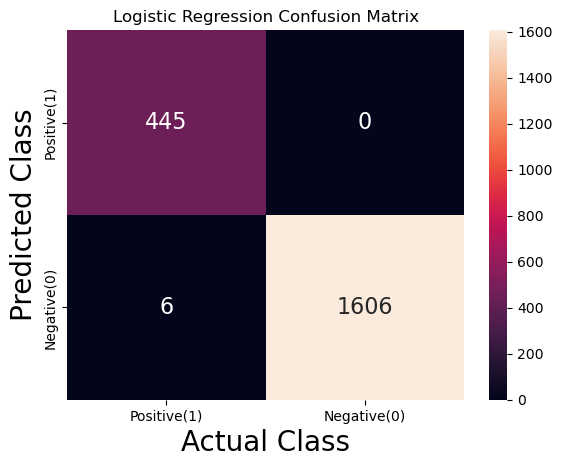

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Plot confusion matrix
cm = confusion_matrix(y_pred_lr, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

2) DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint


# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter distributions for RandomizedSearchCV
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 20),  # Adjust the range as needed
    'min_samples_split': randint(2, 20),  # Adjust the range as needed
    'min_samples_leaf': randint(1, 20),  # Adjust the range as needed
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    decision_tree,
    param_distributions=param_dist,
    n_iter=50,  # Adjust the number of iterations as needed
    scoring='accuracy',  # Change the scoring metric if needed
    cv=5,  # Adjust the number of folds for cross-validation
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_decision_tree = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_dt = best_decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the best hyperparameters
print('Best Hyperparameters for Decision Tree:')
print(random_search.best_params_)

# Print the evaluation metric
print(f'Accuracy: {accuracy_dt}')


Best Hyperparameters for Decision Tree:
{'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy: 0.997569275644142


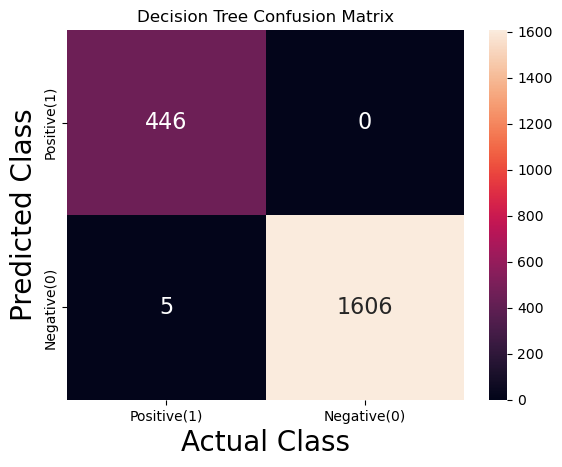

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_dt, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

3) RANDOM FORESTS CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Random Forest with RandomizedSearchCV for Hyperparameter Tuning
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False],
}

random_forest = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    random_forest,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Number of folds for cross-validation
    scoring='accuracy',  # You can use other metrics like 'f1', 'precision', 'recall', etc.
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_random_forest = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the best hyperparameters
print('Best Hyperparameters for random forest:')
print(random_search.best_params_)

# Print the evaluation metric
print(f'Accuracy: {accuracy_rf}')


Best Hyperparameters for random forest:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20, 'bootstrap': False}
Accuracy: 0.997569275644142


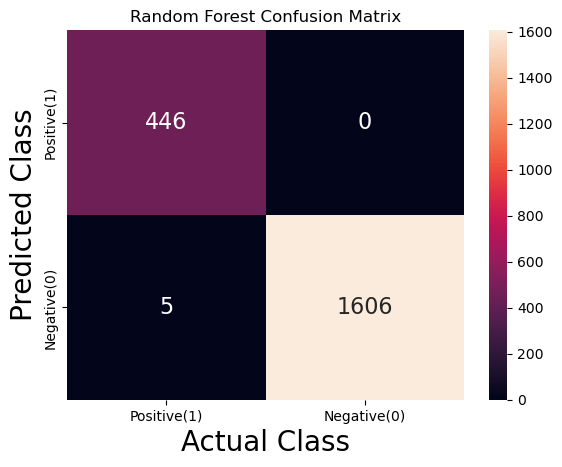

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_rf, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

4) Gradient Boosting Model:

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


# Gradient Boosting
gb_classifier = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    gb_classifier,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_gb_classifier = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_gb = best_gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Print the best hyperparameters
print('Best Hyperparameters for Gradient Boosting:')
print(random_search.best_params_)

# Print the evaluation metrics
print(f'Accuracy: {accuracy_gb}')


Best Hyperparameters for Gradient Boosting:
{'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.1}
Accuracy: 0.997569275644142


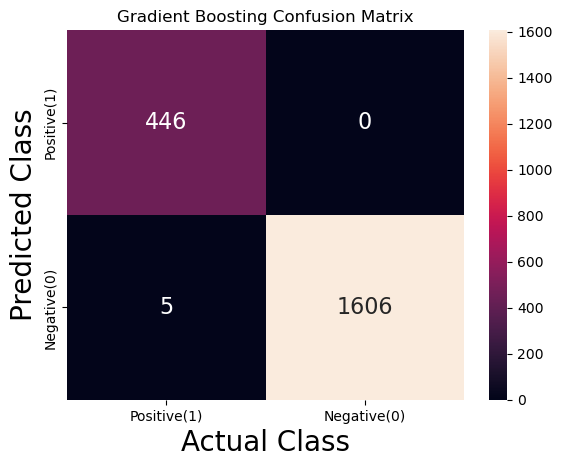

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_gb, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

5) Naive Bayes Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
nb_classifier = MultinomialNB()

# Define hyperparameter grid
param_dist = {
    'alpha': [0.01,0.1, 0.5, 1.0, 2.0, 5.0],
    'fit_prior': [True, False]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    nb_classifier,
    param_distributions=param_dist,
    n_iter=100,  # Adjust the number of iterations as needed
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_nb_classifier = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_nb = best_nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print the best hyperparameters
print('Best Hyperparameters for Naive Bayes:')
print(random_search.best_params_)

# Print the evaluation metrics
print(f'Accuracy: {accuracy_nb}')


Best Hyperparameters for Naive Bayes:
{'fit_prior': True, 'alpha': 0.1}
Accuracy: 0.9513855128828391


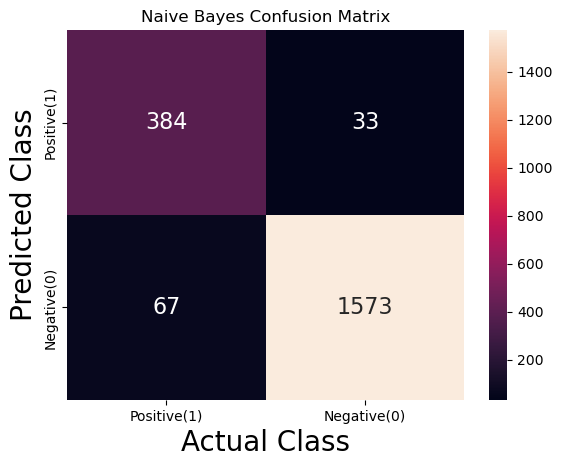

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_pred_nb, y_test, labels = [1,0])
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import keras_tuner
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from kerastuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential, load_model

X = twitter_df['Text']
y = twitter_df['Category']

# Tokenize and pad sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(sequences)


6) LSTM model

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
# Function to create an LSTM model
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
    model.add(LSTM(units=hp.Int('lstm_units', min_value=50, max_value=200, step=10), activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss=BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_padded, (y > 0).astype(int), test_size=0.2, random_state=42)
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust as needed
    directory='my_tuning_directory',  # Specify a directory for logs and checkpoints
    project_name='lstm_hyperparameter_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_trainn, y_trainn, epochs=5, validation_data=(X_testt, y_testt), batch_size=64)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
y_pred = best_model.predict(X_testt)
y_pred_lstm = (y_pred > 0.5).astype(int)
accuracy_lstm = accuracy_score(y_testt, y_pred_lstm)
print(f'Best LSTM Model Accuracy: {accuracy_lstm}')

# Get the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print(f'Best Hyperparameters: {best_hyperparameters}')

Trial 5 Complete [00h 01m 45s]
val_accuracy: 0.9980553984642029

Best val_accuracy So Far: 0.9985415935516357
Total elapsed time: 00h 08m 14s
65/65 [==============================] - 2s 18ms/step
Best LSTM Model Accuracy: 0.9985415653864852
Best Hyperparameters: {'lstm_units': 50, 'learning_rate': 0.01}


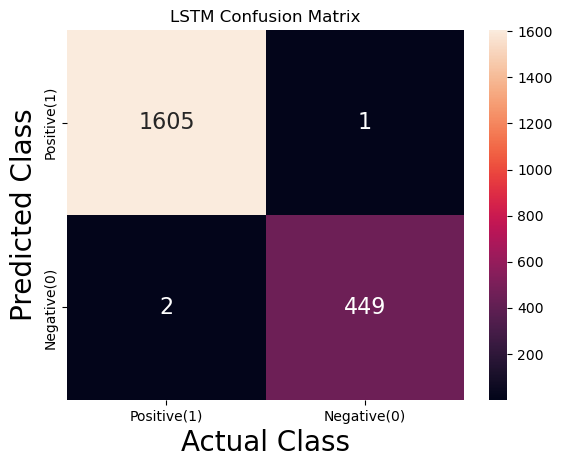

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_testt, y_pred_lstm)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("LSTM Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

7) CNN model

In [ ]:
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Function to build the model
def build_cnn_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
    model.add(Conv1D(filters=hp.Int('conv_filters', min_value=32, max_value=128, step=16),
                     kernel_size=hp.Int('conv_kernel_size', min_value=3, max_value=7),
                     activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss=BinaryCrossentropy(),
        metrics=['accuracy']
    )

    return model

# Split the dataset
X_trainn, X_testt, y_trainn, y_testt = train_test_split(X_padded, (y > 0).astype(int), test_size=0.2, random_state=42)

# Instantiate the tuner
cnn_tuner = RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust as needed
    directory='my_cnn_tuning_directory',  # Specify a directory for logs and checkpoints
    project_name='cnn_hyperparameter_tuning'
)

# Perform hyperparameter tuning
cnn_tuner.search(X_trainn, y_trainn, epochs=5, validation_data=(X_testt, y_testt), batch_size=64)

# Get the best CNN model
best_cnn_model = cnn_tuner.get_best_models(num_models=1)[0]

# Evaluate the best CNN model
y_pred_cnn = best_cnn_model.predict(X_testt)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)
accuracy_cnn = accuracy_score(y_testt, y_pred_cnn)
print(f'Best CNN Model Accuracy: {accuracy_cnn}')

# Get the best hyperparameters for CNN
best_cnn_hyperparameters = cnn_tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print(f'Best CNN Hyperparameters: {best_cnn_hyperparameters}')

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.9985415935516357

Best val_accuracy So Far: 0.9985415935516357
Total elapsed time: 00h 02m 00s
65/65 [==============================] - 0s 4ms/step
Best CNN Model Accuracy: 0.9985415653864852
Best CNN Hyperparameters: {'conv_filters': 48, 'conv_kernel_size': 6, 'learning_rate': 0.01}


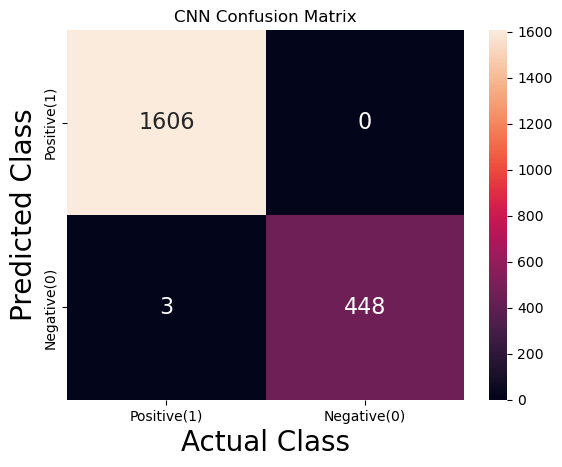

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("CNN Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

8) RNN model

In [ ]:
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
warnings.filterwarnings('ignore')

# Function to create an RNN model
def create_rnn_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=X_padded.shape[1]))
    model.add(SimpleRNN(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Create KerasClassifier
rnn_model = KerasClassifier(build_fn=create_rnn_model, epochs=5, batch_size=64, verbose=0)

# Define tuner
tuner = RandomSearch(
    create_rnn_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust as needed
    directory='tuner',
    project_name='rnn_tuning'
)

# Perform tuning
tuner.search(X_trainn, y_trainn, epochs=5, validation_data=(X_testt, y_testt))

# Get the best model
best_model = tuner.get_best_models()[0]

# Make predictions
y_pred_rnn = best_model.predict(X_testt)
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)

# Evaluate the best model
accuracy_rnn = best_model.evaluate(X_testt, y_testt)[1]
print(f'Best RNN Model Accuracy: {accuracy_rnn}')

# Get the best hyperparameters
best_hyperparameters = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print(f'Best Hyperparameters: {best_hyperparameters}')

Reloading Tuner from tuner\rnn_tuning\tuner0.json
65/65 [==============================] - 1s 8ms/step - loss: 0.0137 - accuracy: 0.9981
Best RNN Model Accuracy: 0.9980553984642029
Best Hyperparameters: {'units': 96, 'dropout_rate': 0.4, 'learning_rate': 0.001}


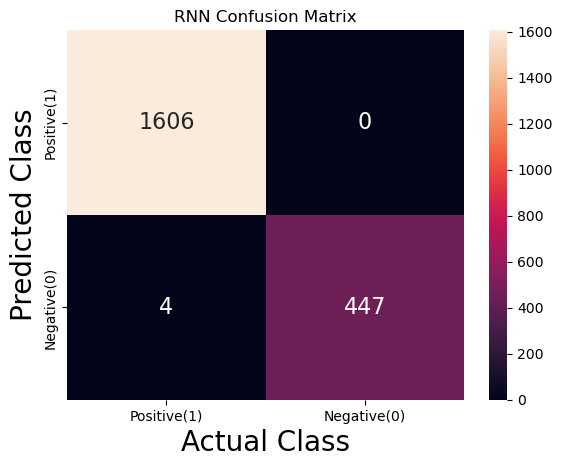

In [ ]:
x_axis_labels = ["Positive(1)","Negative(0)"]
y_axis_labels = ["Positive(1)","Negative(0)"]

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm, xticklabels = x_axis_labels, yticklabels = y_axis_labels, annot = True, fmt='g',annot_kws = {'size': 16})
plt.title("RNN Confusion Matrix")
plt.xlabel("Actual Class", fontsize = 20)
plt.ylabel("Predicted Class", fontsize = 20)
plt.show()

EVALUATING OUR MODELS

In [ ]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [ ]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression Classifier is: ", accuracy_lr, "\n")
print("Accuracy Score of our Decision Tree Classifier is: ", accuracy_dt, "\n")
print("Accuracy Score of our Random Forest Classifier is: ", accuracy_rf, "\n")
print("Accuracy Score of our Gradient bosting Classifier is: ", accuracy_gb, "\n")
print("Accuracy Score of our Naive Baias Classifier is: ", accuracy_nb, "\n")
print("Accuracy Score of our LSTM Classifier is: ", accuracy_lstm, "\n")
print("Accuracy Score of our CNN Classifier is: ", accuracy_cnn, "\n")
print("Accuracy Score of our RNN Classifier is: ", accuracy_rnn, "\n")

THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression Classifier is:  0.9970831307729704 

Accuracy Score of our Decision Tree Classifier is:  0.997569275644142 

Accuracy Score of our Random Forest Classifier is:  0.997569275644142 

Accuracy Score of our Gradient bosting Classifier is:  0.997569275644142 

Accuracy Score of our Naive Baias Classifier is:  0.9513855128828391 

Accuracy Score of our LSTM Classifier is:  0.9985415653864852 

Accuracy Score of our CNN Classifier is:  0.9985415653864852 

Accuracy Score of our RNN Classifier is:  0.9980553984642029 



<Figure size 10000x10000 with 0 Axes>

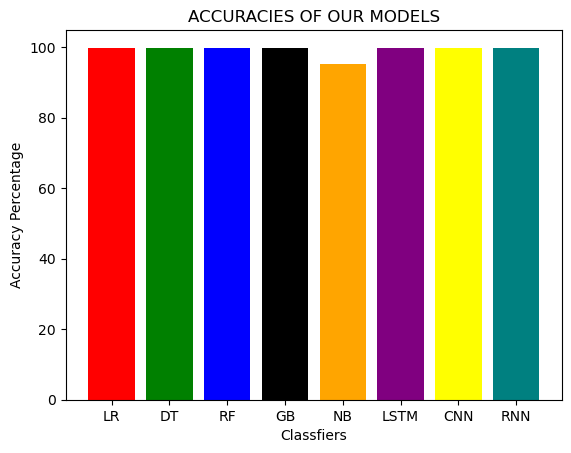

<Figure size 10000x10000 with 0 Axes>

In [ ]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.bar(x = ["LR","DT", "RF", "GB","NB", "LSTM","CNN","RNN"], height = [(accuracy_lr)*100, (accuracy_dt)*100,(accuracy_rf)*100,(accuracy_gb)*100,(accuracy_nb)*100,(accuracy_lstm)*100,(accuracy_cnn)*100,(accuracy_rnn)*100], color = ["red", "green", "blue", "Black", "orange","purple","yellow","Teal"])
plt.title("ACCURACIES OF OUR MODELS")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Classfiers")
plt.figure(figsize=(100,100))

In [ ]:
# CHECKING Binary Cross-Entropy Loss OF MODELS

print("THE Binary Cross-Entropy Loss OF OUR MODELS:", "\n")
print("Loss of our Logistic Regression model is: ", log_loss(y_pred_lr, y_test), "\n")
print("Loss of our Decision Tree Classifier is: ", log_loss(y_pred_dt, y_test), "\n")
print("Loss of our Random Forest Classifier is: ", log_loss(y_pred_rf, y_test), "\n")
print("Loss of our gradient boost Classifier is: ", log_loss(y_pred_gb, y_test), "\n")
print("Loss of our NaiveBayes Classifier is: ", log_loss(y_pred_nb, y_test), "\n")
print("Loss of our LSTM Classifier is: ",log_loss(y_pred_lstm,y_test), "\n")
print("Loss of our CNN Classifier is: ", log_loss(y_pred_cnn, y_test), "\n")
print("Loss of our RNN Classifier is: ", log_loss(y_pred_rnn, y_test), "\n")

THE Binary Cross-Entropy Loss OF OUR MODELS: 

Loss of our Logistic Regression model is:  0.10074742632671234 

Loss of our Decision Tree Classifier is:  0.08395618860559378 

Loss of our Random Forest Classifier is:  0.08395618860559378 

Loss of our gradient boost Classifier is:  0.08395618860559378 

Loss of our NaiveBayes Classifier is:  1.6791109443455967 

Loss of our LSTM Classifier is:  0.05037332444316698 

Loss of our CNN Classifier is:  0.05037371316335668 

Loss of our RNN Classifier is:  0.06716495088447522 



In [ ]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_pred_lr, y_test), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_pred_dt, y_test), "\n")
print("F1 Score of our Random Forest Classifier is: ", f1_score(y_pred_rf, y_test), "\n")
print("F1 Score of our gradient boost Classifier is: ", f1_score(y_pred_gb, y_test), "\n")
print("F1 Score of our NaiveBayes Classifier is: ", f1_score(y_pred_nb, y_test), "\n")
print("F1 Score of our LSTM Classifier is: ", f1_score(y_pred_lstm,y_test), "\n")
print("F1 Score of our CNN Classifier is: ", f1_score(y_pred_cnn, y_test), "\n")
print("F1 Score of our RNN Classifier is: ", f1_score(y_pred_rnn, y_test), "\n")

THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.9933035714285714 

F1 Score of our Decision Tree Classifier is:  0.9944258639910815 

F1 Score of our Random Forest Classifier is:  0.9944258639910815 

F1 Score of our gradient boost Classifier is:  0.9944258639910815 

F1 Score of our NaiveBayes Classifier is:  0.8847926267281105 

F1 Score of our LSTM Classifier is:  0.9966703662597114 

F1 Score of our CNN Classifier is:  0.9966629588431591 

F1 Score of our RNN Classifier is:  0.9955456570155902 



In [ ]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_pred_lr, y_test), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_pred_dt, y_test), "\n")
print("Recall Score of our Random Forest Classifier is: ", recall_score(y_pred_rf, y_test), "\n")
print("Recall Score of our gradient boost Classifier is: ", recall_score(y_pred_gb, y_test), "\n")
print("Recall Score of our NaiveBayes Classifier is: ", recall_score(y_pred_nb, y_test), "\n")
print("Recall Score of our LSTM Classifier is: ", recall_score(y_pred_lstm,y_test), "\n")
print("Recall Score of our CNN Classifier is: ", recall_score(y_pred_cnn, y_test), "\n")
print("Recall Score of our RNN Classifier is: ", recall_score(y_pred_rnn, y_test), "\n")

THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  1.0 

Recall Score of our Decision Tree Classifier is:  1.0 

Recall Score of our Random Forest Classifier is:  1.0 

Recall Score of our gradient boost Classifier is:  1.0 

Recall Score of our NaiveBayes Classifier is:  0.920863309352518 

Recall Score of our LSTM Classifier is:  0.9977777777777778 

Recall Score of our CNN Classifier is:  1.0 

Recall Score of our RNN Classifier is:  1.0 



In [ ]:
# CHECKING THE PRECISION score
from sklearn.metrics import precision_score

print("THE PRECISION SCORES OF OUR MODELS", "\n")
print("PRECISION Score of our Logistic Regression model is: ", precision_score(y_pred_lr, y_test), "\n")
print("PRECISION Score of our Decision Tree Classifier is: ", precision_score(y_pred_dt, y_test), "\n")
print("PRECISION Score of our Random Forest Classifier is: ", precision_score(y_pred_rf, y_test), "\n")
print("PRECISION Score of our gradient boost Classifier is: ", precision_score(y_pred_gb, y_test), "\n")
print("PRECISION Score of our NaiveBayes Classifier is: ", precision_score(y_pred_nb, y_test), "\n")
print("PRECISION Score of our LSTM Classifier is: ", precision_score(y_test,y_pred_lstm) ,"\n")
print("PRECISION Score of our CNN Classifier is: ", precision_score(y_pred_cnn, y_test), "\n")
print("PRECISION Score of our RNN Classifier is: ", precision_score(y_pred_rnn, y_test), "\n")

THE PRECISION SCORES OF OUR MODELS 

PRECISION Score of our Logistic Regression model is:  0.9866962305986696 

PRECISION Score of our Decision Tree Classifier is:  0.9889135254988913 

PRECISION Score of our Random Forest Classifier is:  0.9889135254988913 

PRECISION Score of our gradient boost Classifier is:  0.9889135254988913 

PRECISION Score of our NaiveBayes Classifier is:  0.8514412416851441 

PRECISION Score of our LSTM Classifier is:  0.9977777777777778 

PRECISION Score of our CNN Classifier is:  0.9933481152993349 

PRECISION Score of our RNN Classifier is:  0.991130820399113 



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mae_lr = mean_absolute_error(y_pred_lr, y_test)
mae_dt = mean_absolute_error(y_pred_dt, y_test)
mae_rf = mean_absolute_error(y_pred_rf, y_test)
mae_gb = mean_absolute_error(y_pred_gb, y_test)
mae_mnb = mean_absolute_error(y_pred_nb, y_test)
mae_lstm = mean_absolute_error(y_pred_lstm, y_test)
mae_cnn = mean_absolute_error(y_pred_cnn, y_test)
mae_rnn = mean_absolute_error(y_pred_rnn, y_test)

In [ ]:
print("MEAN ABSOLUTE ERROR OF OUR MODELS", "\n")
print("MEAN ABSOLUTE ERROR of our Logistic Regression model is: ", mae_lr, "\n")
print("MEAN ABSOLUTE ERROR of our Decision Tree Classifier is: ", mae_dt, "\n")
print("MEAN ABSOLUTE ERROR of our Random Forest Classifier is: ", mae_rf, "\n")
print("MEAN ABSOLUTE ERROR of our gradient boost Classifier is: ", mae_gb, "\n")
print("MEAN ABSOLUTE ERROR of our NaiveBayes Classifier is: ", mae_mnb, "\n")
print("MEAN ABSOLUTE ERROR Score of our LSTM Classifier is: ", mae_lstm ,"\n")
print("MEAN ABSOLUTE ERROR of our CNN Classifier is: ", mae_cnn, "\n")
print("MEAN ABSOLUTE ERROR of our RNN Classifier is: ", mae_rnn, "\n")

MEAN ABSOLUTE ERROR OF OUR MODELS 

MEAN ABSOLUTE ERROR of our Logistic Regression model is:  0.002916869227029655 

MEAN ABSOLUTE ERROR of our Decision Tree Classifier is:  0.0024307243558580457 

MEAN ABSOLUTE ERROR of our Random Forest Classifier is:  0.0024307243558580457 

MEAN ABSOLUTE ERROR of our gradient boost Classifier is:  0.0024307243558580457 

MEAN ABSOLUTE ERROR of our NaiveBayes Classifier is:  0.04861448711716091 

MEAN ABSOLUTE ERROR Score of our LSTM Classifier is:  0.0014584346135148275 

MEAN ABSOLUTE ERROR of our CNN Classifier is:  0.0014584346135148275 

MEAN ABSOLUTE ERROR of our RNN Classifier is:  0.0019445794846864365 



In [ ]:
mse_lr = mean_squared_error(y_pred_lr, y_test)
mse_dt = mean_squared_error(y_pred_dt, y_test)
mse_rf = mean_squared_error(y_pred_rf, y_test)
mse_gb = mean_squared_error(y_pred_gb, y_test)
mse_mnb = mean_squared_error(y_pred_nb, y_test)
mse_lstm = mean_squared_error(y_pred_lstm, y_test)
mse_cnn = mean_squared_error(y_pred_cnn, y_test)
mse_rnn = mean_squared_error(y_pred_rnn, y_test)

In [ ]:
print("MEAN SQUARE ERROR OF OUR MODELS", "\n")
print("MEAN SQUARE ERROR of our Logistic Regression model is: ", mse_lr, "\n")
print("MEAN SQUARE ERROR of our Decision Tree Classifier is: ", mse_dt, "\n")
print("MEAN SQUARE ERROR of our Random Forest Classifier is: ", mse_rf, "\n")
print("MEAN SQUARE ERROR of our gradient boost Classifier is: ", mse_gb, "\n")
print("MEAN SQUARE ERROR of our NaiveBayes Classifier is: ", mse_mnb, "\n")
print("MEAN SQUARE ERROR Score of our LSTM Classifier is: ", mse_lstm ,"\n")
print("MEAN SQUARE ERROR of our CNN Classifier is: ", mse_cnn, "\n")
print("MEAN SQUARE ERROR of our RNN Classifier is: ", mse_rnn, "\n")

MEAN SQUARE ERROR OF OUR MODELS 

MEAN SQUARE ERROR of our Logistic Regression model is:  0.002916869227029655 

MEAN SQUARE ERROR of our Decision Tree Classifier is:  0.0024307243558580457 

MEAN SQUARE ERROR of our Random Forest Classifier is:  0.0024307243558580457 

MEAN SQUARE ERROR of our gradient boost Classifier is:  0.0024307243558580457 

MEAN SQUARE ERROR of our NaiveBayes Classifier is:  0.04861448711716091 

MEAN SQUARE ERROR Score of our LSTM Classifier is:  0.0014584346135148275 

MEAN SQUARE ERROR of our CNN Classifier is:  0.0014584346135148275 

MEAN SQUARE ERROR of our RNN Classifier is:  0.0019445794846864365 



In [ ]:
rmse_lr = np.sqrt(mse_lr)
rmse_dt = np.sqrt(mse_dt)
rmse_rf = np.sqrt(mse_rf)
rmse_gb = np.sqrt(mae_gb)
rmse_mnb = np.sqrt(mse_mnb)
rmse_lstm = np.sqrt(mse_lstm)
rmse_cnn = np.sqrt(mse_cnn)
rmse_rnn = np.sqrt(mse_rnn)

In [ ]:
print("ROOT MEAN SQUARE ERROR OF OUR MODELS", "\n")
print("ROOT MEAN SQUARE ERROR of our Logistic Regression model is: ", rmse_lr, "\n")
print("ROOT MEAN SQUARE ERROR of our Decision Tree Classifier is: ", rmse_dt, "\n")
print("ROOT MEAN SQUARE ERROR of our Random Forest Classifier is: ", rmse_rf, "\n")
print("ROOT MEAN SQUARE ERROR of our gradient boost Classifier is: ", rmse_gb, "\n")
print("ROOT MEAN SQUARE ERROR of our NaiveBayes Classifier is: ", rmse_mnb, "\n")
print("ROOT MEAN SQUARE ERROR Score of our LSTM Classifier is: ", rmse_lstm ,"\n")
print("ROOT MEAN SQUARE ERROR of our CNN Classifier is: ", rmse_cnn, "\n")
print("ROOT MEAN SQUARE ERROR of our RNN Classifier is: ", rmse_rnn, "\n")

ROOT MEAN SQUARE ERROR OF OUR MODELS 

ROOT MEAN SQUARE ERROR of our Logistic Regression model is:  0.05400804779872769 

ROOT MEAN SQUARE ERROR of our Decision Tree Classifier is:  0.04930237677696731 

ROOT MEAN SQUARE ERROR of our Random Forest Classifier is:  0.04930237677696731 

ROOT MEAN SQUARE ERROR of our gradient boost Classifier is:  0.04930237677696731 

ROOT MEAN SQUARE ERROR of our NaiveBayes Classifier is:  0.2204869318512118 

ROOT MEAN SQUARE ERROR Score of our LSTM Classifier is:  0.03818945683712754 

ROOT MEAN SQUARE ERROR of our CNN Classifier is:  0.03818945683712754 

ROOT MEAN SQUARE ERROR of our RNN Classifier is:  0.04409738637024236 

